<a href="https://colab.research.google.com/github/cmartinez4269/Carina-Martinez-DS-1002/blob/main/DS_2002_HW_2_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Carina Martinez
# computing id: fyv5hu

# 1.1 Set Up Database

import sqlite3
connection = sqlite3.connect('student_grades.db')
print('Database created and connected.')

Database created and connected.


In [75]:
# 1.2 Create a cursor object to interact with the database.

cursor = connection.cursor()
print("Cursor created.")

cursor.execute('PRAGMA foreign_keys = ON;')
print('Foreign keys on.')

Cursor created.
Foreign keys on.


In [76]:
# 2.1 Create a table to store student information.

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT NOT NULL,
  last_name TEXT NOT NULL)
''')
print('Students table created.')

Students table created.


In [77]:
# 2.2 Create a table to store grade information.

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT NOT NULL,
  grade INTEGER,
  FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')
print('Grades table created.')

Grades table created.


In [78]:
#3.1 Insert sample data into students table.

student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

#Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?,?)
''', student_data)

print("Data inserted into the students table.")

Data inserted into the students table.


In [79]:
#3.2 Insert sample data into grades table.

grade_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 92),
    (3, 'English', 90),
    (3, 'History', 88),
    (4, 'Math', 78),
    (4, 'English', 85),
    (4, 'History', 76),
    (5, 'Math', 90),
    (5, 'English', 88),
    (5, 'History', 92)

]

#Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?,?,?)
''', grade_data)

print("Data inserted into the grades table.")

Data inserted into the grades table.


In [80]:
#4.1 Retrieve all students' names and their grades.

#Have to perform JOIN query to show joint information.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
joined_data = cursor.fetchall()

print('Students and their grades:')
for row in joined_data:
  print(row)

Students and their grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 92)
('Carol', 'White', 'English', 90)
('Carol', 'White', 'History', 88)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 85)
('David', 'Brown', 'History', 76)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'English', 88)
('Eve', 'Davis', 'History', 92)


In [81]:
#4.2 Find the average grade for each student.

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
''')
average_grade = cursor.fetchall()

print('Average grade for each student:')
for row in average_grade:
  print(row)

Average grade for each student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 90.0)
('David', 'Brown', 79.66666666666667)
('Eve', 'Davis', 90.0)


In [82]:
#4.3 Find the student with the highest average grade.

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1;
''')

row = cursor.fetchone()
print("Student with highest average grade:")
print(row)


Student with highest average grade:
('Alice', 'Johnson', 91.0)


In [83]:
#4.4 Find the average grade for the Math subject.

cursor.execute('''
SELECT AVG(grades.grade) AS average_math_grade
FROM grades
WHERE grades.subject = 'Math'
''')

row = cursor.fetchone()
print("Average grade for Math subject:")
print(row)

Average grade for Math subject:
(87.4,)


In [84]:
#4.5 List all students who scored above 90 in any subject.

cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
''')

row = cursor.fetchall()
print("Students who scored above 90 in any subject:")
print(row)

Students who scored above 90 in any subject:
[('Alice', 'Johnson'), ('Carol', 'White'), ('Eve', 'Davis')]


In [85]:
#5.1 Use Pandas to load the data from the students and grades table into the DataFrames.

import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [86]:
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [87]:
#5.3 Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade.

combined_data = ('''
  SELECT students.first_name, students.last_name, grades.subject, grades.grade
  FROM students
  JOIN grades ON students.student_id = grades.student_id
''')

df = pd.read_sql_query(combined_data, connection)
print(df)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     92
7       Carol     White  English     90
8       Carol     White  History     88
9       David     Brown     Math     78
10      David     Brown  English     85
11      David     Brown  History     76
12        Eve     Davis     Math     90
13        Eve     Davis  English     88
14        Eve     Davis  History     92


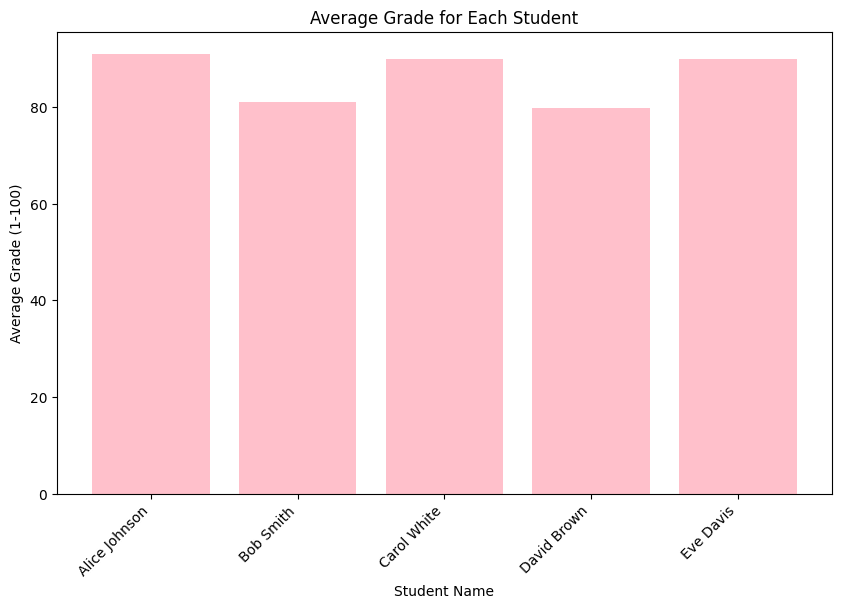

In [97]:
#5.3 Visualize the data with Matplotlib:

import matplotlib.pyplot as plt
students_avg = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
'''
df_avg = pd.read_sql_query(students_avg, connection)

plt.figure(figsize=(10,6))
plt.bar(df_avg['first_name']+' '+ df_avg['last_name'], df_avg['average_grade'], color = 'pink')
plt.xlabel('Student Name')
plt.ylabel('Average Grade (1-100)')
plt.title('Average Grade for Each Student')
plt.xticks(rotation= 45, ha = 'right')
plt.show()